載入模型所必須要的相依套件

In [ ]:
import torch
import transformers
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
from transformers import BertModel, BertTokenizer
from transformers import AdamW, get_linear_schedule_with_warmup

%matplotlib inline


讀取先求有data_extract.py所處理完的資料，並將資料區分成train(49500筆)與validate(500筆)兩個部分

In [ ]:
TRAIN = pd.read_json("./data/train.json")
TRAIN = TRAIN.sample(frac=1).reset_index(drop=True)
VAL = pd.read_json("./data/test.json")
VAL = VAL.sample(frac=1).reset_index(drop=True)
TRAIN = TRAIN.append(VAL[500:]).reset_index(drop=True)
VAL = VAL.iloc[:500]


In [ ]:
TRAIN.head()

,comment,score
0,Titanic directed by James Cameron presents a f...,9
1,I have nothing against a fast-paced fright-fli...,3
2,SPOILER ALERT!!!!<br /><br />I had just watche...,10
3,"Once again, like Charlie's Angels, Inspector G...",2
4,"It' just funny, watch it!!! <br /><br />OK the...",10


查看資料集的基礎屬性

In [ ]:
TRAIN.info()
VAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49500 entries, 0 to 49499
Data columns (total 2 columns):
comment    49500 non-null object
score      49500 non-null int64
dtypes: int64(1), object(1)
memory usage: 773.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
comment    500 non-null object
score      500 non-null int64
dtypes: int64(1), object(1)
memory usage: 7.9+ KB


匯出資料及的標籤值(label)分布情形

Text(0.5, 0, 'review score')

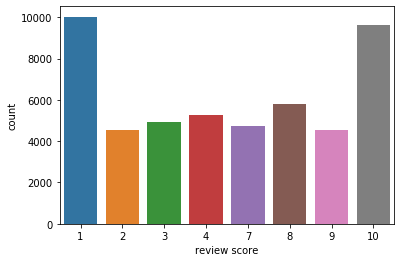

In [ ]:
sns.countplot(TRAIN.score)
plt.xlabel('review score')